### Quyen Linh TA

#### Test Algo

In [1]:
% matplotlib inline
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy
from sklearn.cluster import KMeans

#### Dataset 1

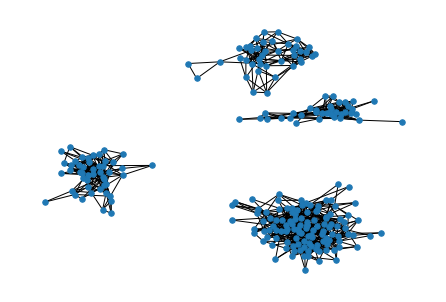

In [3]:
# Read data (graph edges)
data_path = os.path.join('data', 'example1.dat')
with open(data_path) as f:
    edges = [tuple([int(x) for x in line.strip().split(',')]) for line in f]

# Extract nodes
nodes = np.unique(np.asarray(edges))
num_nodes = nodes.shape[0]

# Visualize graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, node_size=30, pos=nx.spring_layout(G, k=0.05, iterations=20))
plt.show()

Based on the visualization, I expect k = 4.
#### K-eigenvector algorithm

In [4]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0] - 1, tup[1] - 1] = 1

# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct the matrix L (called normalized laplacian)
D_ = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_, A), D_)

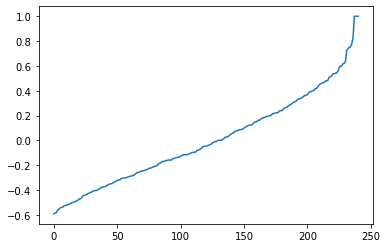

In [5]:
# Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w, v = scipy.linalg.eigh(L)
plt.plot(w)
plt.show()

In [6]:
# Find optimal k (where the eigenvalues start dropping)
k = np.argmin(np.ediff1d(np.flipud(w))) + 1
print('As expected, k = %d.' % k)

As expected, k = 4.


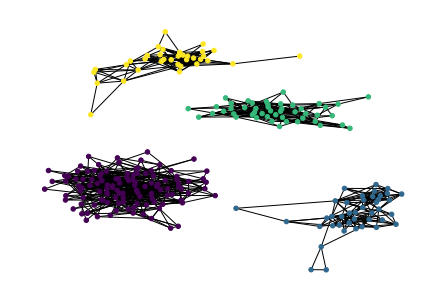

In [7]:
# Extract k largest eigenvectors
X = v[:, num_nodes - k:]

# Construct matrix Y by renormalizing X
Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

# Cluster rows of Y into k clusters using K-means 
kmeans = KMeans(n_clusters=k, random_state=1234).fit(Y)

# Assign original point i to the cluster of the row i of matrix Y
cluster_labels = kmeans.labels_
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)

### Find communities using the Fiedler Vector

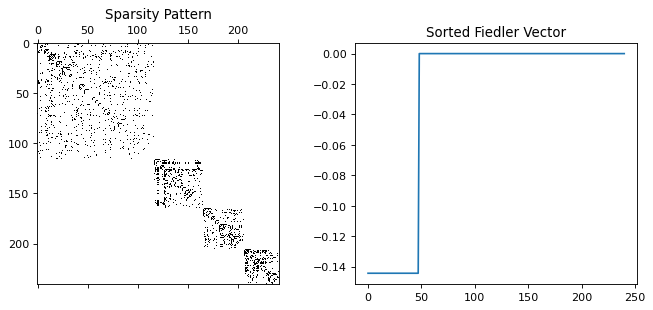

In [8]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0] - 1, tup[1] - 1] = 1

# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct Laplacian matrix L
L = D - A

# Get eigenvalues in ascending order
w, X = scipy.linalg.eigh(L)

# Get Fiedler Vector: The eigenvector corresponding to second smallest eigenvalue of L
fv = X[:, 1]

# Plot the sparsity pattern and sorted fiedler vector
fig = plt.figure(figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.spy(A)
plt.title('Sparsity Pattern')
plt.subplot(1, 2, 2)
plt.plot(np.sort(fv))
plt.title('Sorted Fiedler Vector')
plt.show()

#### Dataset 2

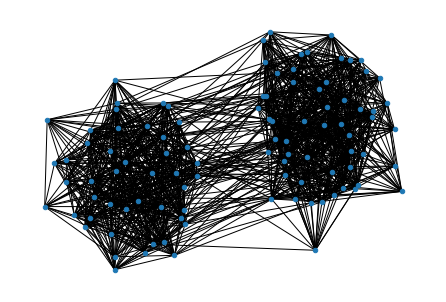

In [10]:
# Read data (graph edges)
data_path = os.path.join('data', 'example2.dat')
with open(data_path) as f:
    edges2 = [tuple([int(x) for x in line.strip().split(',')]) for line in f]
edges2 = [tuple([edge[0], edge[1]]) for edge in edges2]

# Extract nodes
nodes2 = np.unique(np.asarray(edges2))
num_nodes2 = nodes2.shape[0]

# Visualize graph
G2 = nx.Graph()
G2.add_nodes_from(nodes2)
G2.add_edges_from(edges2)
nx.draw(G2, node_size=20, pos=nx.spring_layout(G2, k=0.05, iterations=20))
plt.show()

Based on the visualization, we expect k = 2.
### K-eigenvector algorithm

In [11]:
# Construct affinity matrix A
A = np.zeros([num_nodes2, num_nodes2])
for tup in edges2:
    A[tup[0] - 1, tup[1] - 1] = 1

# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct the matrix L (called normalized laplacian)
D_ = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_, A), D_)

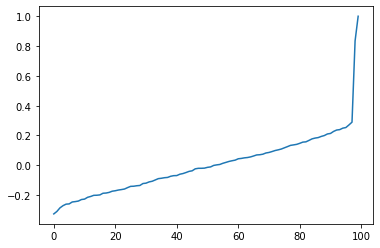

In [12]:
# Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w, v = scipy.linalg.eigh(L)
plt.plot(w)
plt.show()

In [13]:
# Find optimal k (where the eigenvalues start dropping)
k = np.argmin(np.ediff1d(np.flipud(w))) + 1
print('As expected, k = %d.' % k)

As expected, k = 2.


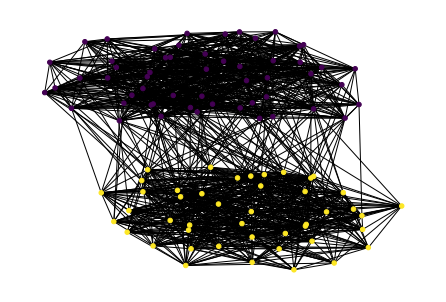

In [14]:
# Extract k largest eigenvectors
X = v[:, num_nodes2 - k:]

# Construct matrix Y by renormalizing X
Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

# Cluster rows of Y into k clusters using K-means 
kmeans2 = KMeans(n_clusters=k, random_state=1234).fit(Y)

# Assign original point i to the cluster of the row i of matrix Y
cluster_labels2 = kmeans2.labels_
nx.draw(G2, node_size=20, pos=nx.spring_layout(G2, k=0.05, iterations=20), node_color=cluster_labels2)

### Find communities using the Fiedler Vector

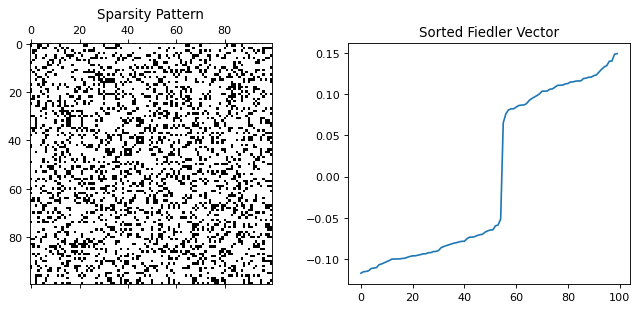

In [16]:
# Construct affinity matrix A
A = np.zeros([num_nodes2, num_nodes2])
for tup in edges2:
    A[tup[0] - 1, tup[1] - 1] = 1

# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct Laplacian matrix L
L = D - A

# Get eigenvalues in ascending order
w, X = scipy.linalg.eigh(L)

# Get Fiedler Vector: The eigenvector corresponding to second smallest eigenvalue of L
fv = X[:, 1]

# Plot the sparsity pattern and sorted fiedler vector
fig = plt.figure(figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.spy(A)
plt.title('Sparsity Pattern')
plt.subplot(1, 2, 2)
plt.plot(np.sort(fv))
plt.title('Sorted Fiedler Vector')
plt.show()